---
title: "Lab 5"
format:
  html:
    embed-resources: true
    code-fold: true
execute:
  echo: true
  warning: false
  message: false
---

# **Part One : Data Exploration**



1. Read in the dataset, and display some summaries of the data.

In [2]:
import pandas as pd
import numpy as np
insurance_costs = pd.read_csv("/content/insurance_costs_1.csv")

In [5]:
# Getting some general info on data
insurance_costs.info()

# Checking out the descriptive statistics
display(insurance_costs.describe())

# CHecking for an missing values for a column
display(insurance_costs.isnull().sum())

# Just want to check out first 5 rows
insurance_costs.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


,0
age,0
sex,0
bmi,0
smoker,0
region,0
charges,0


,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


2. Fix any concerns you have about the data.

For this there doesn't seem to be any missing values, but we should make those categorical variables into dummy variables

In [8]:
insurance_costs_dummied = pd.get_dummies(insurance_costs, columns=['sex', 'smoker', 'region'])

insurance_costs_dummied.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,True,False,False,True,False,False,False,True
1,33,22.705,21984.47061,False,True,True,False,False,True,False,False
2,32,28.880,3866.85520,False,True,True,False,False,True,False,False
3,31,25.740,3756.62160,True,False,True,False,False,False,True,False
4,60,25.840,28923.13692,True,False,True,False,False,True,False,False


Now that the data has been explored and preprocessed, I'll create some plots to visualize the relationship between 'charges' and other variables.

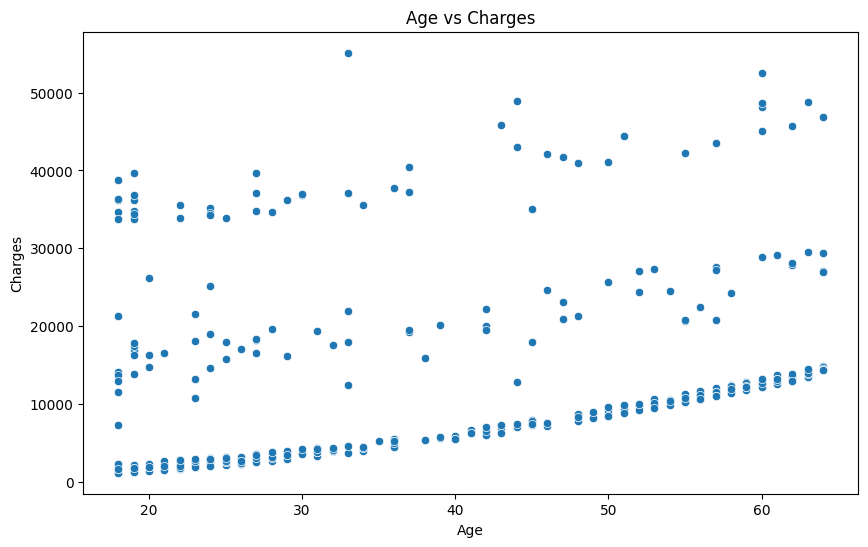

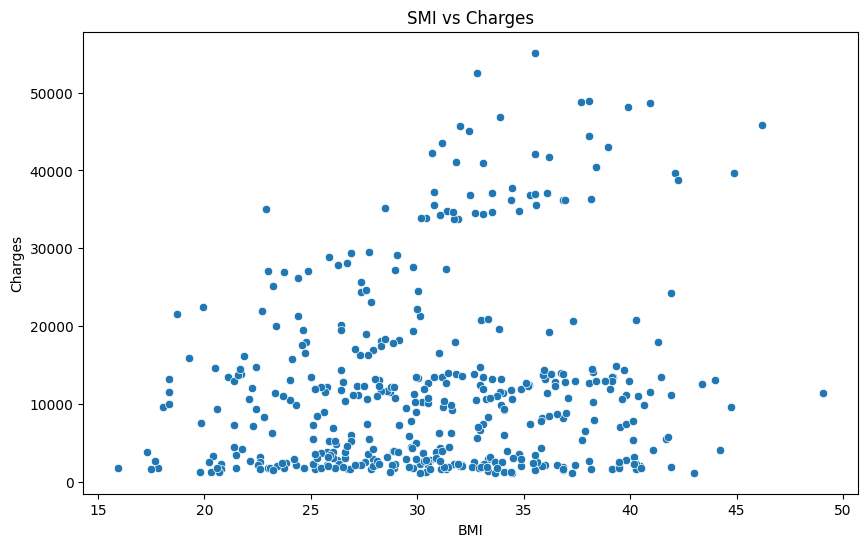

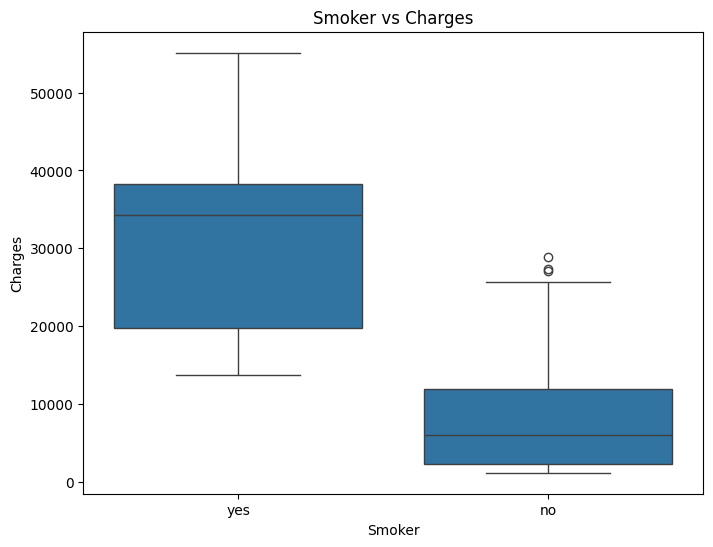

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Age vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance_costs)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Plot 2: BMI vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_costs)
plt.title('SMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Plot 3: Smoker vs Charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_costs)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Pretty intresting plots, for the first there seems so be higher chargers the older you get, but there is 3 distinct lines which is VERY intresting -- I assume these maybe represent categorical variabels like sex or smoking which having a huge difference of lines, but I would need to investigate more to be sure

The second plot shows higher BMI often associated with higher charges, but very intresting shape it's taking

Then the final one is unsuprisingly showing that smoking has a huge assoication with higher insurance charges

# **Part Two: Simple Linear Models**

1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.


In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Defing the variables of the model - -could of also just put these variables below but I wanted to
#    keep everything more organized for one of the first times doing this
X_age = insurance_costs_encoded[['age']]
y = insurance_costs_encoded['charges']

# Creating and fitting the linear models
model_age = LinearRegression()
model_age.fit(X1, y)

# Discussing model fit and interpreting the coefficient estimates
print("The model Intercept is :", model_age_sklearn.intercept_)
print("The coefficient for Age is:", model_age_sklearn.coef_[0])
print("R-squared:", model_age_sklearn.score(X1, y))

The model Intercept is : 3611.758798507106
The coefficient for Age is: 228.79904937243666
R-squared: 0.09938105452062707


The Intercept would tell us that someone with an age of 0 would have an average charge of 3,611. This of course does not make a lot of sense as a newborn baby would not have insurance.

The coefficient for age is 228.80 meaning that each year of life, the average insurance is charge is estimated to increase by an average od 228.80  $

The R-squared shows that this model is not doing a very good job, onlt explaining 10% of the variation of insurane charges. We can likely tell from this that age, as we could assume, is not the only factor infleuncing insurance charges


2. Make a model that also incorporates the variable sex. Report your results.



In [22]:
# Defining the variables I am going to use in the model \
X_age_sex = insurance_costs_encoded[['age', 'sex_male']]
y = insurance_costs_encoded['charges']

# Create and making the fit of the Linear Regression model
model_age_sex = LinearRegression()
model_age_sex.fit(X_age_sex, y)

# Discussing model fit and interpreting the coefficient estimates
print("Model Intercept:", model_age_sex.intercept_)
print("Coefficients (Age, Sex_male):", model_age_sex.coef_)
print("R-squared:", model_age_sex.score(X_age_sex, y))

Model Intercept: 3315.3323465342655
Coefficients (Age, Sex_male): [228.42586236 649.83258997]
R-squared: 0.10012952499706396


The Model intercept tells us that for somone who has age 0, and sex_male = 0, which since we made that a dummy variable represents female's since that is the only other option in this case, that average expected insurance charge would be 3,315. Again, a baby girl just born would not get insurance, but it is the baseline for our model.

THe age coefficient says the same thing above with a just barely different value saying that on average, each year of you rlife adds an expected 228.40 dollars to your insurance. The Sex_male coefficient is saying that on average, males pay $649.83 dollars more than females for insurance, holding all other variables, in this case age, constant.

Finally the R-squared is slightly better for this at 0.1001, but not by much, still just saying that only 10% of variation in insurance charges is expalined by this model.

3. Now make a model that does not include sex, but does include smoker. Report your results.



In [23]:
# Define the dependent and independent variables for the new model (age and smoker)
X_age_smoker = insurance_costs_encoded[['age', 'smoker_yes']] # Using the one-hot encoded smoker column
y = insurance_costs_encoded['charges']

# Create and fit the Linear Regression model
model_age_smoker = LinearRegression()
model_age_smoker.fit(X_age_smoker, y)

# Display the intercept, coefficients, and R-squared value
print("Model Intercept:", model_age_smoker.intercept_)
print("Coefficients (Age, Smoker_yes):", model_age_smoker.coef_)
print("R-squared:", model_age_smoker.score(X_age_smoker, y))

Model Intercept: -2166.852295375431
Coefficients (Age, Smoker_yes): [  253.14535549 24048.86743795]
R-squared: 0.7603842948069404


This model tells us that for someone who has an age of 0, and Smoker_yes = 0, which means they are not a smoker, has an expected insurance charge of -2,166. This of course makes NOOO sense in practice as you would never have a negative insurance charge. This just serves as the base for the model

THe age coefficient says the same thing above with a just barely different value saying that on average, each year of you rlife adds an expected 253.14 dollars to your insurance. The big difference here is out smoker_yes coefficient is HUGE saying that on average, being a smoker adds a whopping 24,048$ to your insurance charge,. This is HUGE.

The R-squared is also SO Much higher, with an r-squared of 0.76, sayign that 76% of the variation in insurance charges is explained by this model, showing off how infleuncial the smoking variable is. This model seems to be much much better than the first two based on thsi large r-sqaured value.

4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [39]:
from sklearn.metrics import mean_squared_error

# Evaluating the age and sex model
y_pred_age_sex = model_age_sex.predict(X_age_sex)
age_sex_MSE = mean_squared_error(y, y_pred_age_sex)


# Evaluating the age and smoker model
y_pred_age_smoker = model_age_smoker.predict(X_age_smoker)
age_smoker_MSE = mean_squared_error(y, y_pred_age_smoker)

print(f"Mean Squared Error's: [age_sex_MSE: {age_sex_MSE}, age_smoker_MSE: {age_smoker_MSE}]")

Mean Squared Error's: [age_sex_MSE: 126633939.67937087, age_smoker_MSE: 33719831.46524373]


Model 3 WAYYYY better fits the data. This was clear right away with a way large R-squared of 0.7604 compared to Model 2's R-squared of 0.1001, showing that model 3 way better explains the variability in insurance charges based on it's model.

This is then confirmed with a MUCH smaller Model 3 MSE of 33,719,831 comapred to Model 2 with a huge MSE of 126,633,939. Not that either are super small (and with data like this, MSE's are naturally going to be very large), but Model 3's is much much smaller which is a good thing.

Overall from both of these, we can see Model 3 fits the data a lot better and smoking status seems to have a much stronger linear relationship with insurance charges than sex does.

# **Part Three: Multiple Linear Models**

Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?



In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Define the variables being used here then running it
X_age_bmi = insurance_costs[['age', 'bmi']]
y = insurance_costs['charges']
model_age_bmi = LinearRegression()
model_age_bmi.fit(X_age_bmi, y)


# Calcualting R sqaured
r_squared_age_bmi = model_age_bmi.score(X_age_bmi, y)

# Calcualting MSE
y_pred_age_bmi = model_age_bmi.predict(X_age_bmi)
mse_age_bmi = mean_squared_error(y, y_pred_age_bmi)

# Displaying all the same key info again - going to do this for each question
print("The intercept for the model:", model_age_bmi.intercept_)
print("Coefficients for Age and BMI :", model_age_bmi.coef_)
print(" THe R squared calcualted:", r_squared_age_bmi)
print("MSE of the model", mse_age_bmi)



The intercept for the model: -4627.533445708479
Coefficients for Age and BMI : [216.29721472 283.20380126]
 THe R squared calcualted: 0.12032144234129338
MSE f the model 123792439.58129103


In [43]:
y_pred_age = model_age.predict(X_age)
age_MSE = mean_squared_error(y, y_pred_age)

print("MSE of the model", age_MSE)


MSE of the model 126739267.91026388


I had to rerun the MSE for Part two Q1 as seen above

But the model for Part 3 Q1 is better than Part 2 Q1 with a slightly smaller MSE and larger R-sqaured. It is not that much better, but it does have an r-squared of 0.1203 compared to 0.0994, showing the model is explaining more of the variation in insurance charges, and the MSE is slightly lower at 123,792,439 compared to 126,739,267.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?



In [46]:
# I am just getting in the habit of running all the packages so I am not forgetting any of them
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Felt like the easiest way to do this would just be naming this new variable as sqaured
insurance_costs['age_squared'] = insurance_costs['age']**2

# Making the model again -- calling this one model_age_sqaured
X_age_squared = insurance_costs[['age', 'age_squared']]
y = insurance_costs['charges']
model_age_squared = LinearRegression()
model_age_squared.fit(X_age_squared, y)

# R sqaurd
r_squared_age_squared = model_age_squared.score(X_age_squared, y)

# MSE
y_pred_age_squared = model_age_squared.predict(X_age_squared)
mse_age_squared = mean_squared_error(y, y_pred_age_squared)

# Display the results
print("The intercept for the model :", model_age_squared.intercept_)
print("Coefficients for Age and Age sqaured : ", model_age_squared.coef_)
print("R-squared calculated : ", r_squared_age_squared)
print("MSE", mse_age_squared)



The intercept for the model : 2299.730568726698
Coefficients for Age and Age sqaured :  [308.42816984  -1.00150889]
R-squared calculated :  0.09958694669946933
MSE 126710293.80956802


It looks like the R-squared and MSE are almost the EXACT same for part 2 Q1 with just age as a predictor and this, part 3 Q2 with age and age squared. The r-sqaured is  0.09958 vs 0.09938 and the MSE is 126,710,293 vs 126,739,267. So although this model is technially SLIGHLTY better at accounting for variation and having a slightly lower MSE, the almost identifical results I don't think make it worth it

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?



In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# So I looked at the notes/online and found this to be the most efficient way to do polynomials
poly_4 = PolynomialFeatures(degree=4)
X_age_poly_4 = poly_4.fit_transform(insurance_costs[['age']])

# Now I can actually fit the model again
model_age_poly_4 = LinearRegression()
model_age_poly_4.fit(X_age_poly_4, insurance_costs['charges'])

# Once again getting R-squared and MSE -- for a lot of these copy, paste, and change
r_squared_age_poly_4 = model_age_poly_4.score(X_age_poly_4, insurance_costs['charges'])
y_pred_age_poly_4 = model_age_poly_4.predict(X_age_poly_4)
mse_age_poly_4 = mean_squared_error(insurance_costs['charges'], y_pred_age_poly_4)

# Display the results
print("The intercept for the model :", model_age_poly_4.intercept_)
print("Coefficients for Age and Age sqaured : ", model_age_poly_4.coef_)
print("R-squared calculated : ", r_squared_age_poly_4)
print("MSE", mse_age_poly_4)


The intercept for the model : 68637.89782225997
Coefficients for Age and Age sqaured :  [ 0.00000000e+00 -7.94841022e+03  3.58110163e+02 -6.47905090e+00
  4.12933982e-02]
R-squared calculated :  0.1078293145318373
MSE 125550389.64569835
R-squared (Polynomial model, degree 4): 0.1078293145318373
Mean Squared Error (Polynomial model, degree 4): 125550389.64569835


The R-squared is slightly higher at 0.1078293145318373 instead of 0.09938105452062707 and the MSE is lower at 125,550,389 instead of 126,739, 267 in Part 2 question 1, but again this difference is prerrt subtle and not the most dramatic

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?


In [52]:
# Doing same process as I have wrote and commented out above
poly_features_12 = PolynomialFeatures(degree=12)
X_age_poly_12 = poly_features_12.fit_transform(insurance_costs[['age']])
model_age_poly_12 = LinearRegression()
model_age_poly_12.fit(X_age_poly_12, insurance_costs['charges'])

# R-sqaured/MSE
r_squared_age_poly_12 = model_age_poly_12.score(X_age_poly_12, insurance_costs['charges'])
y_pred_age_poly_12 = model_age_poly_12.predict(X_age_poly_12)
mse_age_poly_12 = mean_squared_error(insurance_costs['charges'], y_pred_age_poly_12)

# Display the results
print("The intercept for the model :", model_age_poly_12.intercept_)
print("Coefficients for Age and Age sqaured : ", model_age_poly_12.coef_)
print("R-squared calculated : ", r_squared_age_poly_12)
print("MSE", mse_age_poly_12)

The intercept for the model : 7722.308179874744
Coefficients for Age and Age sqaured :  [ 0.00000000e+00 -4.34928279e-14  5.85425535e-16  1.78099505e-14
  5.21213777e-13  1.33165430e-11  2.88763668e-10  4.86792507e-09
  4.93848760e-08 -3.05862710e-09  7.07651716e-11 -7.24805911e-13
  2.77079487e-15]
R-squared calculated :  0.10734541968547884
MSE 125618485.56893076


Pretty much same resullt as Part 3 question 3-- this model is a little better than P2 Q1 but not by a dramatic amount

the MSE is 125,618,485 compared to 126,739, 267 in Part 2 question 1 and the R-squared is 0.1073 compared to 0.09938 in P2Q1


5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?


SO the best model from part 3 was Age and BMI (not with an interaction though) since it had an r-squared of 0.120321 and none of the others were above a 0.11. It also had the lowest MSE of 123792439. I do agree this is the best model, because it felt like the polynomial models were making it complex without really adding much benefit. This model added BMI which it does make sense this would at least slightly help predict insurance, as maybe those out of shape would be a bigger risk fo health issues to isurance companies.

I will say, if we only look at the age variable and it's fellow polynomial models, The forth degree model had the higighest R-sqaured techncially with one of 0.107829 with the 12-degree having an almost equaiavelt 0.107345. THhe standard just Age had 0.099381 which is lower, but these much higher one's, specically 12 degree, have the risk of overfitting while barely actually enhancing the model


6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

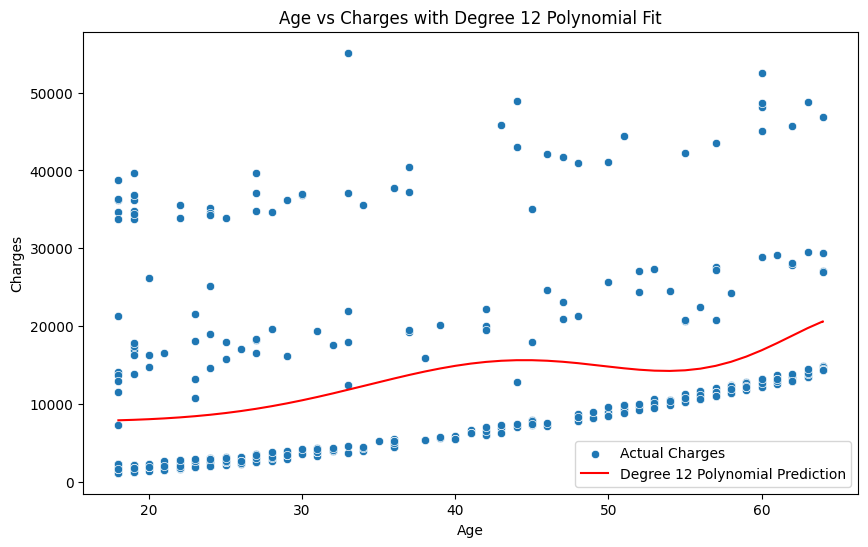

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sorting it in the right order -- this was the only part I needed online recoruces for as I was a bit confused how to sort ths correctly
insurance_costs_sorted = insurance_costs.sort_values('age')
X_age_poly_12_sorted = poly_features_12.transform(insurance_costs_sorted[['age']]) # Use the existing poly_features_12 object
y_pred_age_poly_12 = model_age_poly_12.predict(X_age_poly_12_sorted)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance_costs, label='Actual Charges')

# Overlay the line plot of the predictions
plt.plot(insurance_costs_sorted['age'], y_pred_age_poly_12, color='red', label='Degree 12 Polynomial Prediction')

# Add labels and title
plt.title('Age vs Charges with Degree 12 Polynomial Fit')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

# **Part Four: New data**

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

* For each model, fit the model on the original data.

* Then, use the fitted model to predict on the new data.

* Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

* Make a plot showing the residuals of your final chosen model.

0. I am going to load in the data and encode it like I did with the old data

In [56]:
import pandas as pd
import numpy as np
insurance_costs_2 = pd.read_csv("/content/insurance_costs_2.csv")
insurance_costs_2.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [57]:
insurance_costs_2_encoded = pd.get_dummies(insurance_costs_2, columns=['sex', 'smoker', 'region'])
display(insurance_costs_2_encoded.head())

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,23,34.400,1826.84300,False,True,True,False,False,False,False,True
1,56,40.300,10602.38500,False,True,True,False,False,False,False,True
2,18,34.100,1137.01100,False,True,True,False,False,False,True,False
3,63,23.085,14451.83515,True,False,True,False,True,False,False,False
4,63,28.310,13770.09790,False,True,True,False,False,True,False,False



1. For each model, fit the model on the original data.

In [58]:
# Doing the same steps for all of these, just establishing the interaction obviosuly took a little bit more wor
# As I talk about below, rlly hoping thats how you do it I got confused

# Same y for all these so may as well establish it up here
y = insurance_costs_encoded['charges']

# Model 1: Age
X_model1 = insurance_costs_encoded[['age']]
model1_age = LinearRegression()
model1_age.fit(X_model1, y)

# Model 2: Age and BMI
X_model2 = insurance_costs_encoded[['age', 'bmi']]
model2_age_bmi = LinearRegression()
model2_age_bmi.fit(X_model2, y)

# Model 3: Age, BMI, and Smoker
X_model3 = insurance_costs_encoded[['age', 'bmi', 'smoker_yes']]
model3_age_bmi_smoker = LinearRegression()
model3_age_bmi_smoker.fit(X_model3, y)

# Model 4: Age and BMI with interaction terms with Smoker --- through some trial and error this seemed to be the easiest way to make an interaction -- will be checking
# with professor to see if there is a better way to do this
insurance_costs_encoded['age_smoker_interaction'] = insurance_costs_encoded['age'] * insurance_costs_encoded['smoker_yes']
insurance_costs_encoded['bmi_smoker_interaction'] = insurance_costs_encoded['bmi'] * insurance_costs_encoded['smoker_yes']
X_model4 = insurance_costs_encoded[['age', 'bmi', 'age_smoker_interaction', 'bmi_smoker_interaction']]
model4_age_bmi_smoker_interaction = LinearRegression()
model4_age_bmi_smoker_interaction.fit(X_model4, y)

# Model 5: Age, BMI, and Smoker with interaction terms
X_model5 = insurance_costs_encoded[['age', 'bmi', 'smoker_yes', 'age_smoker_interaction', 'bmi_smoker_interaction']]
model5_age_bmi_smoker_full_interaction = LinearRegression()
model5_age_bmi_smoker_full_interaction.fit(X_model5, y)

LinearRegression()


2.  Then, use the fitted model to predict on the new data.

In [59]:
# Predict on Model 1
predictions_model1 = model1_age.predict(insurance_costs_2_encoded[['age']])

# Predict on Model 2
predictions_model2 = model2_age_bmi.predict(insurance_costs_2_encoded[['age', 'bmi']])

# Predict on Model 3
predictions_model3 = model3_age_bmi_smoker.predict(insurance_costs_2_encoded[['age', 'bmi', 'smoker_yes']])

# Predict using Model 4 - I realized (after some issues haha,) I needed to create interaction terms in the new data as well
insurance_costs_2_encoded['age_smoker_interaction'] = insurance_costs_2_encoded['age'] * insurance_costs_2_encoded['smoker_yes']
insurance_costs_2_encoded['bmi_smoker_interaction'] = insurance_costs_2_encoded['bmi'] * insurance_costs_2_encoded['smoker_yes']
predictions_model4 = model4_age_bmi_smoker_interaction.predict(insurance_costs_2_encoded[['age', 'bmi', 'age_smoker_interaction', 'bmi_smoker_interaction']])

# Predict using Model 5
predictions_model5 = model5_age_bmi_smoker_full_interaction.predict(insurance_costs_2_encoded[['age', 'bmi', 'smoker_yes', 'age_smoker_interaction', 'bmi_smoker_interaction']])

3. Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

In [67]:
from sklearn.metrics import mean_squared_error

mse_model1 = mean_squared_error(insurance_costs_2_encoded['charges'], predictions_model1)
mse_model2 = mean_squared_error(insurance_costs_2_encoded['charges'], predictions_model2)
mse_model3 = mean_squared_error(insurance_costs_2_encoded['charges'], predictions_model3)
mse_model4 = mean_squared_error(insurance_costs_2_encoded['charges'], predictions_model4)
mse_model5 = mean_squared_error(insurance_costs_2_encoded['charges'], predictions_model5)


print("MSE for Model 1 : ", mse_model1)
print("MSE for Model 2 : ", mse_model2)
print("MSE for Model 3 : ", mse_model3)
print("MSE for Model 4 : ", mse_model4)
print("MSE for Model 5 : ", mse_model5)



MSE for Model 1 :  136077136.50195494
MSE for Model 2 :  132636406.1108129
MSE for Model 3 :  35377541.24141632
MSE for Model 4 :  24795908.41264334
MSE for Model 5 :  21786256.86685252


It looks like Model 5 is the best with the lowest MSE of 21786256! This does make sense as it includes the most things (not that more always means MSE, but in this case it did include a very representative range) with age, bmi, and smoker as predictors, with both quantitative variables having an interaction term with smoker

So this is the best model based on our original data being trained and tested on our new data. A very cool way to look at data!

4.  Make a plot showing the residuals of your final chosen model.

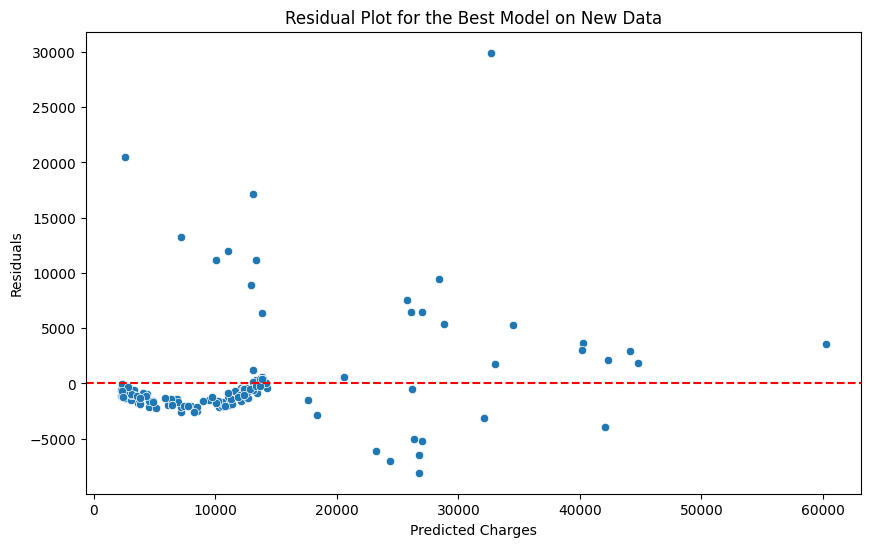

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate residuals
residuals = insurance_costs_2_encoded['charges'] - predictions_model5

# Create scatter plot of predicted vs residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_model5, y=residuals)

# Add labels and title
plt.title('Residual Plot for the Best Model on New Data')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Display the plot
plt.show()

Defintely not perfect, but this residual plot is doing a pretty good job! Very cool to see in graphical form

# **Part Five: Full Exploration**

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

THe best model I found was 'age', 'bmi', 'smoker_yes', 'age_smoker_interaction', 'bmi_smoker_interaction', 'age_squared', 'age_squared_smoker_interaction' which is

In [94]:
best_model_features = ['age', 'bmi', 'smoker_yes', 'age_smoker_interaction', 'bmi_smoker_interaction', 'age_squared', 'age_squared_smoker_interaction']

In [95]:
import pandas as pd

# Create 'age_squared' and 'age_squared_smoker_interaction' in the original encoded DataFrame
insurance_costs_encoded['age_squared'] = insurance_costs_encoded['age']**2
insurance_costs_encoded['age_squared_smoker_interaction'] = insurance_costs_encoded['age_squared'] * insurance_costs_encoded['smoker_yes']

# Create 'age_squared' and 'age_squared_smoker_interaction' in the new encoded DataFrame
insurance_costs_2_encoded['age_squared'] = insurance_costs_2_encoded['age']**2
insurance_costs_2_encoded['age_squared_smoker_interaction'] = insurance_costs_2_encoded['age_squared'] * insurance_costs_2_encoded['smoker_yes']


In [96]:
# Select the features of the overall best model from insurance_costs_encoded
X_train = insurance_costs_encoded[best_model_features]
# Select the 'charges' column from insurance_costs_encoded as the training target
y_train = insurance_costs_encoded['charges']

# Train a LinearRegression model named model_best_poly
model_best_poly = LinearRegression()
model_best_poly.fit(X_train, y_train)

LinearRegression()

MSE for the best polynomial model on new data: 21637148.258091316


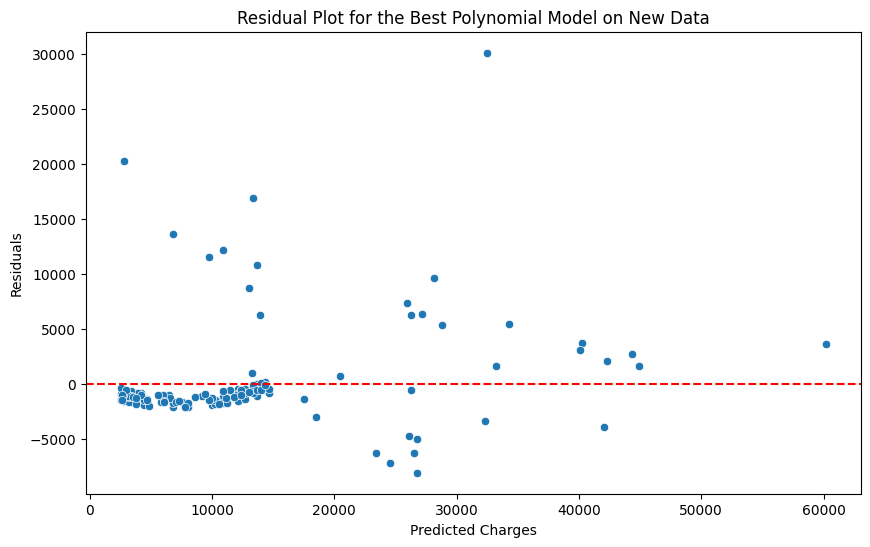

In [97]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features for the overall best model identified by the user
best_model_features = ['age', 'bmi', 'smoker_yes', 'age_smoker_interaction', 'bmi_smoker_interaction', 'age_squared', 'age_squared_smoker_interaction']


# Select the features of the overall best model from insurance_costs_2_encoded
X_test = insurance_costs_2_encoded[best_model_features]
# Select the 'charges' column from insurance_costs_2_encoded as the test target
y_test = insurance_costs_2_encoded['charges']

# Use the trained model_best_poly to predict charges on X_test
predictions = model_best_poly.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, predictions)

print(f"MSE for the best polynomial model on new data: {mse}")

# Calculate the residuals
residuals = y_test - predictions

# Create a scatter plot of predicted vs residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)

# Add labels and title
plt.title('Residual Plot for the Best Polynomial Model on New Data')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Display the plot
plt.show()

THE MSE on this was lower than any other model I tried with an MSE of 21637148.258091316

This was very hard for me to find, with repetative trial and error of different models, and also trying some code that iterated through possible combinations (with some AI help), but ultatemlyit was just the time of trying different ones and finding what is best

I am defintely curious the most optimal and time saving way to do this =